In [ ]:
import pandas as pd

df_entrada = pd.read_csv('/content/drive/My Drive/FREDE/entradac1.txt')
df_saida = pd.read_csv('/content/drive/My Drive/FREDE/saidac1.txt')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_entrada, df_saida, 
                                                    test_size=0.20,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.fit_transform(y_test)

In [ ]:
from sklearn.svm import SVR
model = SVR(kernel='linear', gamma='scale', coef0=0.0, tol=0.001)
model.fit(X_train,y_train) #treinamento do modelo
y_pred = model.predict(X_test)
y_pred_train=model.predict(X_train)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("="*15)
print(" R² = %.4f" % (r2_score(y_test,y_pred)))
print("="*15)
print(" MAE = %.4f" % (mean_absolute_error(y_test,y_pred)))
print("="*15)
print(" MSE = %.4f" % (mean_squared_error(y_test,y_pred)))
print("="*15)  

In [ ]:
y_pred_i = scaler.inverse_transform(y_pred)
y_test_i = scaler.inverse_transform(y_test)


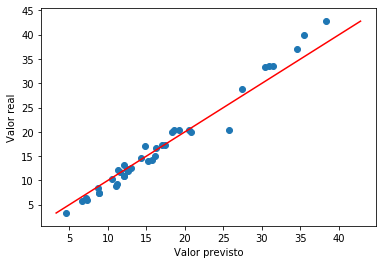

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot([min(y_test_i),max(y_test_i)],[min(y_test_i),max(y_test_i)],'-r')
plt.scatter(y_pred_i,y_test_i)
plt.xlabel("Valor previsto")
plt.ylabel("Valor real")
plt.show()
